In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm_notebook
from keras.datasets import mnist



In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
data_path = '/content/drive/My Drive/A_Z Handwritten Data'
data = pd.read_csv(data_path +'/A_Z Handwritten Data.csv', header= None).astype('float32')
print(data.head(10))

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0 

In [4]:
print(data.describe())

                 0         1         2         3         4         5    \
count  372451.000000  372451.0  372451.0  372451.0  372451.0  372451.0   
mean       13.523454       0.0       0.0       0.0       0.0       0.0   
std         6.740852       0.0       0.0       0.0       0.0       0.0   
min         0.000000       0.0       0.0       0.0       0.0       0.0   
25%        10.000000       0.0       0.0       0.0       0.0       0.0   
50%        14.000000       0.0       0.0       0.0       0.0       0.0   
75%        18.000000       0.0       0.0       0.0       0.0       0.0   
max        25.000000       0.0       0.0       0.0       0.0       0.0   

            6         7         8         9    ...            775  \
count  372451.0  372451.0  372451.0  372451.0  ...  372451.000000   
mean        0.0       0.0       0.0       0.0  ...       0.001616   
std         0.0       0.0       0.0       0.0  ...       0.490788   
min         0.0       0.0       0.0       0.0  ...       

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 785 entries, 0 to 784
dtypes: float32(785)
memory usage: 1.1 GB
None


In [6]:
print(data.tail())

         0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
372446  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372447  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372448  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372449  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372450  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        778  779  780  781  782  783  784  
372446  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
372447  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
372448  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
372449  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
372450  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 785 columns]


In [7]:
# Drop the first column by its index (0)
X = data.drop(0, axis=1)

# Assign the first column to y
y = data[0]


In [8]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)


Train data shape:  (297960, 28, 28)
Test data shape:  (74491, 28, 28)


In [9]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [10]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74491, 28, 28, 1)


In [11]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74491, 26)


In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor =0.2, patience= 1, min_lr=0.0001)
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 2, verbose=0, mode='auto')
history = model.fit(train_X, train_yOHE, epochs=5,  validation_data = (test_X,test_yOHE))

Epoch 1/5
9312/9312 [==============================] - 408s 44ms/step - loss: 0.1615 - accuracy: 0.9571 - val_loss: 0.0887 - val_accuracy: 0.9758
Epoch 2/5
9312/9312 [==============================] - 400s 43ms/step - loss: 0.0740 - accuracy: 0.9797 - val_loss: 0.0672 - val_accuracy: 0.9816
Epoch 3/5
9312/9312 [==============================] - 404s 43ms/step - loss: 0.0631 - accuracy: 0.9830 - val_loss: 0.0813 - val_accuracy: 0.9783
Epoch 4/5
9312/9312 [==============================] - 411s 44ms/step - loss: 0.0580 - accuracy: 0.9846 - val_loss: 0.0562 - val_accuracy: 0.9852
Epoch 5/5
9312/9312 [==============================] - 400s 43ms/step - loss: 0.0547 - accuracy: 0.9854 - val_loss: 0.0585 - val_accuracy: 0.9852


In [13]:
model.save(r'/content/drive/My Drive/A_Z Handwritten Data/model_v5')

In [14]:
test_x = np.expand_dims(test_x, axis=-1)

scores = model.evaluate(test_x, test_yOHE, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Accuracy: 98.52%


In [15]:
training_accuracy = history.history['accuracy'][-1] * 100
validation_accuracy = history.history['val_accuracy'][-1] * 100
training_loss = history.history['loss'][-1]
validation_loss = history.history['val_loss'][-1]

# Print the accuracy and loss in terms of percentage
print(f"The training accuracy is: {training_accuracy:.2f}%")
print(f"The validation accuracy is: {validation_accuracy:.2f}%")
print(f"The training loss is: {training_loss:.2f}")
print(f"The validation loss is: {validation_loss:.2f}")


The training accuracy is: 98.54%
The validation accuracy is: 98.52%
The training loss is: 0.05
The validation loss is: 0.06


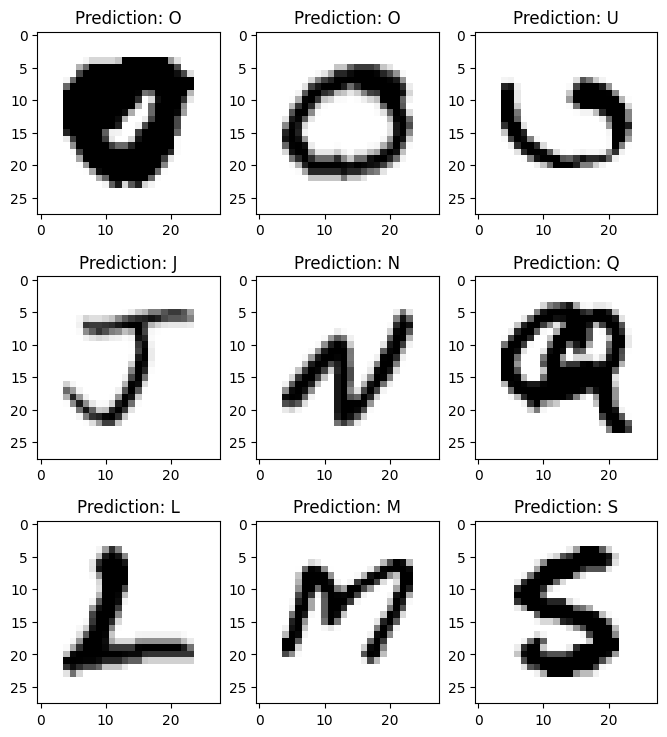

In [16]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()


for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")

    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    #ax.grid()

1/1 [==============================] - 0s 128ms/step


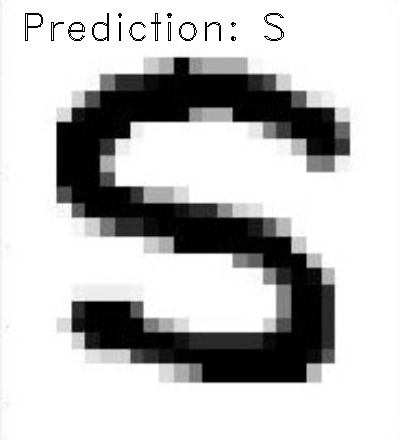

In [17]:
import cv2
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow

model = load_model('/content/drive/My Drive/A_Z Handwritten Data/model_v5')

word_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

img_path = '/content/drive/My Drive/A_Z Handwritten Data/S.JPG'
img = cv2.imread(img_path)
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400, 440))
img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28, 28))
img_final = np.reshape(img_final, (1, 28, 28, 1))
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Prediction: " + img_pred, (20, 40), cv2.FONT_HERSHEY_DUPLEX, 1.3, color=(0, 0, 0))
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 [==============================] - 0s 99ms/step


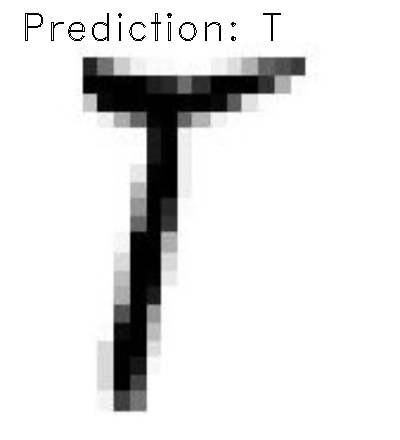

In [19]:
import cv2
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow

model = load_model('/content/drive/My Drive/A_Z Handwritten Data/model_v5')

word_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

img_path = '/content/drive/My Drive/A_Z Handwritten Data/T.JPG'
img = cv2.imread(img_path)
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400, 440))
img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28, 28))
img_final = np.reshape(img_final, (1, 28, 28, 1))
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Prediction: " + img_pred, (20, 40), cv2.FONT_HERSHEY_DUPLEX, 1.3, color=(0, 0, 0))
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
